# Google Play Store Apps

Google Play store has huge numbers of Apps. It allows users to search for Apps, check reviews, install Apps and rate Apps. Investigating these Apps can help the Apps publishers in making there decisions when developing Apps. In this notebook, I will analyze a dataset of [Google Play store](https://www.kaggle.com/lava18/google-play-store-apps) that contains data of 2018. 

### Dataset

The dataset contains 13 features: 

* *App:* Application name
* *Category:* Category the app belongs to
* *Rating:* Overall user rating of the app 
* *Reviews:* Number of user reviews for the app 
* *Size:* Size of the app 
* *Installs:* Number of user downloads/installs for the app 
* *Type:* Paid or Free
* *Price:* Price of the app 
* *Content Rating:* Age group the app is targeted at - Children / Mature 21+ / Adult
* *Genres:* An app can belong to multiple genres (apart from its main category). For e.g., a musical family game will belong to Music, Game, Family
* *Last Updated:* Date when the app was last updated on Play Store 
* *Current Ver:* Current version of the app available on Play Store 
* *Android Ver:* Min required Android version 



This notebook answer the following questions:

* What is the most popular App category?
* Which App has the largest size?
* Which App has not been updated?
* Which App has the largest number of insatllation? 
* Which App has the largest number of reviews?
* Explore paid and free Apps.
* Which App has the highest number of rating?
* Can we predict the App rate from its features? 


In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


In [2]:
# Read data from csv file
df = pd.read_csv('googleplaystore.csv')
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [3]:
df.shape

(10841, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.describe()

Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

## 1. Data Wrangling

### Removing Null Values 

In [6]:
# Shows number of null rows in each column
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
# Remove null values in 'Rating' column
df.dropna(subset = ['Rating'], axis = 0, inplace = True)
df.head() 

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [8]:
# Shows number of null rows in each column
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [9]:
# Remove null values in 'Current Ver', 'Android Ver' and 'Content Rating' columns
df.dropna(subset=['Current Ver', 'Android Ver', 'Content Rating'], axis = 0, inplace = True)
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [10]:
# Shows number of null rows in each column
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### Removing Duplicated Rows 

In [11]:
# Drop dublicate rows
df = df.drop_duplicates()

In [12]:
df.shape

(8886, 13)

### Correcting Invalid Values

In [13]:
# Convert Last Updated type to datetime
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  
0               Art & Design   2018-01-07               1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play   2018-01-15               2.0.0  4.0.3 and up  
2               Art & Design   2018-08-01               1.2.4  4.0.3 and up  
3               Art & Design   2018-06-08  Varies with device    4.2 and up  
4    Art & Design;Creativity   2018-06-20                 1.1    4.4 and up

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8886 non-null   object        
 1   Category        8886 non-null   object        
 2   Rating          8886 non-null   float64       
 3   Reviews         8886 non-null   object        
 4   Size            8886 non-null   object        
 5   Installs        8886 non-null   object        
 6   Type            8886 non-null   object        
 7   Price           8886 non-null   object        
 8   Content Rating  8886 non-null   object        
 9   Genres          8886 non-null   object        
 10  Last Updated    8886 non-null   datetime64[ns]
 11  Current Ver     8886 non-null   object        
 12  Android Ver     8886 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 971.9+ KB


## 2. Data Exploratory

### Most Popular Category
The most popular category that has the largest number of installs.

In [15]:
# Convert 'Installs' column to suitable format 
# Remove '+' and ','
df['Installs Num'] = df['Installs'].str[:-1].apply(lambda x: x.replace(',', ""))
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  \
0               Art & Design   2018-01-07               1.0.0  4.0.3 and up   
1  Art & Design;Pretend Play   2018-01-15               2.0.0  4.0.3 and up   
2               Art & Design   2018-08-01               1.2.4  4.0.3 and up   
3               Art & Design   2018-06-08  Varies with device    4.2 and up   
4    Art & Design;Creativity   2018-06-20                 1.1    4.4 and up   

  Installs Num  
0        10000  
1       500000  
2      5000000  
3     50000000  
4       100000

In [16]:
# Convert 'Installs Num' to numeric
df['Installs Num'] = pd.to_numeric(df['Installs Num'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8886 non-null   object        
 1   Category        8886 non-null   object        
 2   Rating          8886 non-null   float64       
 3   Reviews         8886 non-null   object        
 4   Size            8886 non-null   object        
 5   Installs        8886 non-null   object        
 6   Type            8886 non-null   object        
 7   Price           8886 non-null   object        
 8   Content Rating  8886 non-null   object        
 9   Genres          8886 non-null   object        
 10  Last Updated    8886 non-null   datetime64[ns]
 11  Current Ver     8886 non-null   object        
 12  Android Ver     8886 non-null   object        
 13  Installs Num    8886 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(11)


In [17]:
# Group installs numbers by categories  
categories = df.groupby(['Category']).sum()['Installs Num']
categories

Category
ART_AND_DESIGN           124228100
AUTO_AND_VEHICLES         53129800
BEAUTY                    26916200
BOOKS_AND_REFERENCE     1916291655
BUSINESS                 863518120
COMICS                    56036100
COMMUNICATION          24152241530
DATING                   206522410
EDUCATION                533852000
ENTERTAINMENT           2455660000
EVENTS                    15949410
FAMILY                 10041080590
FINANCE                  770312400
FOOD_AND_DRINK           257777750
GAME                   31543862717
HEALTH_AND_FITNESS      1361006220
HOUSE_AND_HOME           125082000
LIBRARIES_AND_DEMO        61083000
LIFESTYLE                534741120
MAPS_AND_NAVIGATION      724267560
MEDICAL                   42162676
NEWS_AND_MAGAZINES      5393110650
PARENTING                 31116110
PERSONALIZATION         2074341930
PHOTOGRAPHY             9721243130
PRODUCTIVITY           12463070180
SHOPPING                2573331540
SOCIAL                 12513841475
SPORTS     

In [18]:
# Sort by number of intalls
categories = pd.DataFrame(categories).sort_values(by = "Installs Num", ascending = False).reset_index()
categories

Category  Installs Num
0                  GAME   31543862717
1         COMMUNICATION   24152241530
2                SOCIAL   12513841475
3          PRODUCTIVITY   12463070180
4                 TOOLS   11450224500
5                FAMILY   10041080590
6           PHOTOGRAPHY    9721243130
7      TRAVEL_AND_LOCAL    6361859300
8         VIDEO_PLAYERS    6221897200
9    NEWS_AND_MAGAZINES    5393110650
10             SHOPPING    2573331540
11        ENTERTAINMENT    2455660000
12      PERSONALIZATION    2074341930
13  BOOKS_AND_REFERENCE    1916291655
14               SPORTS    1528531465
15   HEALTH_AND_FITNESS    1361006220
16             BUSINESS     863518120
17              FINANCE     770312400
18  MAPS_AND_NAVIGATION     724267560
19            LIFESTYLE     534741120
20            EDUCATION     533852000
21              WEATHER     426096500
22       FOOD_AND_DRINK     257777750
23               DATING     206522410
24       HOUSE_AND_HOME     125082000
25       ART_AND_DESIGN     124228100
26   LIBRARIES_AND_DEMO      61083000
27               COMICS      56036100
28    AUTO_AND_VEHICLES      53129800
29              MEDICAL      42162676
30            PARENTING      31116110
31               BEAUTY      26916200
32               EVENTS      15949410

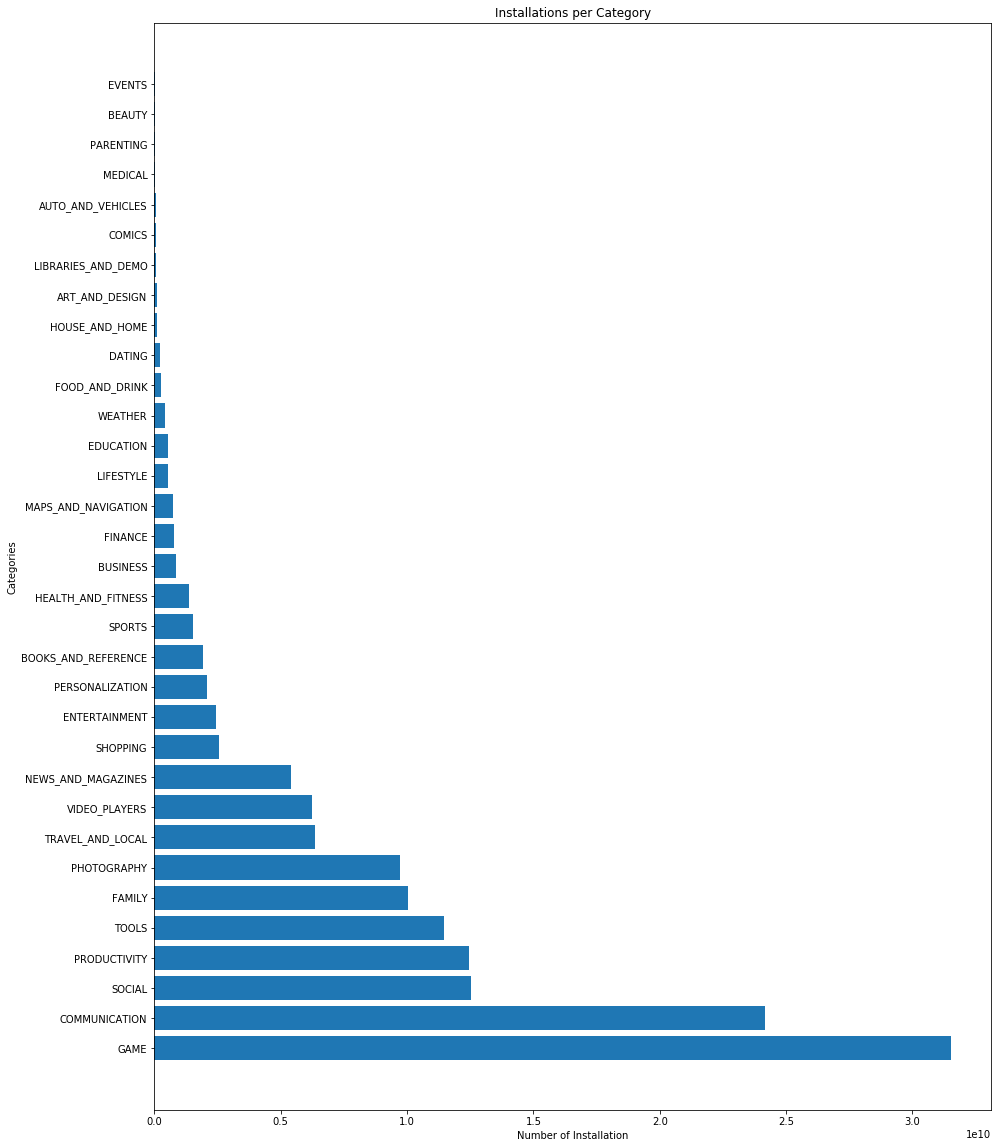

In [19]:
# Show installations per categoty in bar chart
fig, ax = plt.subplots(figsize = (15, 20))
ax.barh(categories['Category'], categories['Installs Num'])
ax.set_xlabel('Number of Installation')
ax.set_ylabel('Categories')
ax.set_title('Installations per Category')
plt.show()

## App with the Largest Size
Find the application that has the largest size.

In [20]:
# Check the values of the Apps sizes
pd.unique(df['Size'])

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [21]:
# Convert size values
def convert_size(s):
    
    # Remove .0 value
    s['Size2'] = s['Size'].replace('.0','')
    
    # Remove '.'
    s['Size2'] = s['Size2'].replace('.','')
    
    # Convert k to 000,  M to 000000 and 'Varies with device' to 1 
    if ('k' in s['Size2']):
        s['Size2'] = s['Size2'].replace('k','000')
    elif ('M' in s['Size2']):
        s['Size2'] = s['Size2'].replace('M','000000')
    else :
        s['Size2'] = 1
    s['Size2'] = pd.to_numeric(s['Size2'], errors='coerce')
    
    return s

# Apply the function
df = df.apply(convert_size, axis=1)
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  \
0               Art & Design   2018-01-07               1.0.0  4.0.3 and up   
1  Art & Design;Pretend Play   2018-01-15               2.0.0  4.0.3 and up   
2               Art & Design   2018-08-01               1.2.4  4.0.3 and up   
3               Art & Design   2018-06-08  Varies with device    4.2 and up   
4    Art & Design;Creativity   2018-06-20                 1.1    4.4 and up   

   Installs Num     Size2  
0         10000  19000000  
1        500000  14000000  
2       5000000  87000000  
3      50000000  25000000  
4        100000  28000000

In [22]:
# Create a dataframe for known size
df_known_size = df[df['Size2'] != 1]
df_known_size.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  \
0               Art & Design   2018-01-07               1.0.0  4.0.3 and up   
1  Art & Design;Pretend Play   2018-01-15               2.0.0  4.0.3 and up   
2               Art & Design   2018-08-01               1.2.4  4.0.3 and up   
3               Art & Design   2018-06-08  Varies with device    4.2 and up   
4    Art & Design;Creativity   2018-06-20                 1.1    4.4 and up   

   Installs Num     Size2  
0         10000  19000000  
1        500000  14000000  
2       5000000  87000000  
3      50000000  25000000  
4        100000  28000000

In [23]:
# Get the max value
df_known_size[df_known_size['Size2'] == df_known_size['Size2'].max()]

App            Category  \
1080                                         Post Bank             FINANCE   
1565                    Talking Babsy Baby: Baby Games           LIFESTYLE   
1758                            Hungry Shark Evolution                GAME   
1793                 Mini Golf King - Multiplayer Game                GAME   
1988                            Hungry Shark Evolution                GAME   
2299                              Navi Radiography Pro             MEDICAL   
3973                            Hungry Shark Evolution                GAME   
4690                                        Vi Trainer  HEALTH_AND_FITNESS   
5427                                   Ultimate Tennis              SPORTS   
5530                       The Walking Dead: Our World                GAME   
5862                             Miami crime simulator                GAME   
5865                      Gangster Town: Vice District              FAMILY   
7404                                   SimCity BuildIt              FAMILY   
8409  Car Crash III Beam DH Real Damage Simulator 2018                GAME   
8847                        Draft Simulator for FUT 18              SPORTS   
9170                     Stickman Legends: Shadow Wars                GAME   

      Rating  Reviews  Size      Installs  Type   Price Content Rating  \
1080     4.5    60449  100M    1,000,000+  Free       0       Everyone   
1565     4.0   140995  100M   10,000,000+  Free       0       Everyone   
1758     4.5  6074334  100M  100,000,000+  Free       0           Teen   
1793     4.5   531458  100M    5,000,000+  Free       0       Everyone   
1988     4.5  6074627  100M  100,000,000+  Free       0           Teen   
2299     4.7       11  100M          500+  Paid  $15.99       Everyone   
3973     4.5  6071542  100M  100,000,000+  Free       0           Teen   
4690     3.6      124  100M        5,000+  Free       0       Everyone   
5427     4.3   183004  100M   10,000,000+  Free       0       Everyone   
5530     4.0    22435  100M    1,000,000+  Free       0           Teen   
5862     4.0   254518  100M   10,000,000+  Free       0     Mature 17+   
5865     4.3    65146  100M   10,000,000+  Free       0     Mature 17+   
7404     4.5  4218587  100M   50,000,000+  Free       0   Everyone 10+   
8409     3.6      151  100M       10,000+  Free       0       Everyone   
8847     4.6   162933  100M    5,000,000+  Free       0       Everyone   
9170     4.4    38419  100M    1,000,000+  Paid   $0.99   Everyone 10+   

                      Genres Last Updated   Current Ver   Android Ver  \
1080                 Finance   2018-07-23        2.9.12    4.0 and up   
1565  Lifestyle;Pretend Play   2018-07-16           9.0    4.0 and up   
1758                  Arcade   2018-07-25         6.0.0    4.1 and up   
1793                  Sports   2018-07-20        3.04.1  4.0.3 and up   
1988                  Arcade   2018-07-25         6.0.0    4.1 and up   
2299                 Medical   2018-01-14         1.2.0  4.0.3 and up   
3973                  Arcade   2018-07-25         6.0.0    4.1 and up   
4690        Health & Fitness   2018-08-02      2.0.0.11    5.0 and up   
5427                  Sports   2018-07-19     2.29.3118  4.0.3 and up   
5530                  Action   2018-08-01       1.1.0.3    5.0 and up   
5862                  Action   2018-07-09           2.0    4.0 and up   
5865              Simulation   2018-05-31           2.1    4.0 and up   
7404              Simulation   2018-06-19  1.23.3.75024    4.0 and up   
8409                  Racing   2018-05-20          1.03    4.1 and up   
8847                  Sports   2018-05-11          25.7    4.1 and up   
9170                  Action   2018-08-03        2.3.24    4.1 and up   

      Installs Num      Size2  
1080       1000000  100000000  
1565      10000000  100000000  
1758     100000000  100000000  
1793       5000000  100000000  
1988     100000000  100000000  
2299           500  100000000  

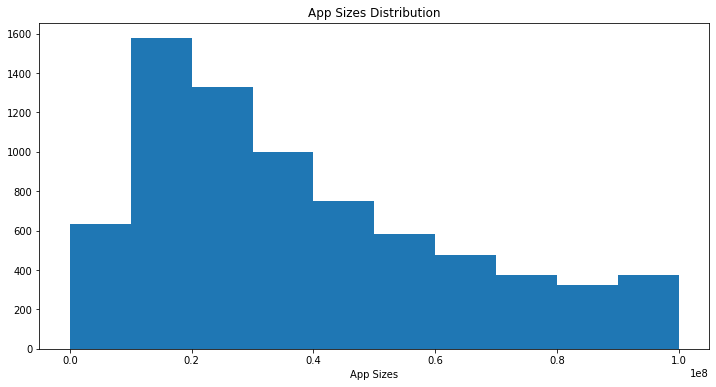

In [24]:
#The distribution of the apps sizes
fig, ax = plt.subplots(figsize = (12, 6))
ax.hist(df_known_size['Size2'])
ax.set_xlabel('App Sizes')
ax.set_title('App Sizes Distribution')
plt.show()

You can notice that, the largest size is 100 M and the size of the most apps is between 20 M and 30 M.

## App Which Hasn't been Updated
Which app has not been updated for a long time. This can be done by comparing the current date with the last date that the app was actually updated.

In [25]:
# Check the last updated year and number of apps
updates_df = pd.DataFrame(df.groupby(df['Last Updated'].dt.year).count()['App']).reset_index()
updates_df

Last Updated   App
0          2010     1
1          2011    15
2          2012    21
3          2013    91
4          2014   185
5          2015   383
6          2016   638
7          2017  1457
8          2018  6095

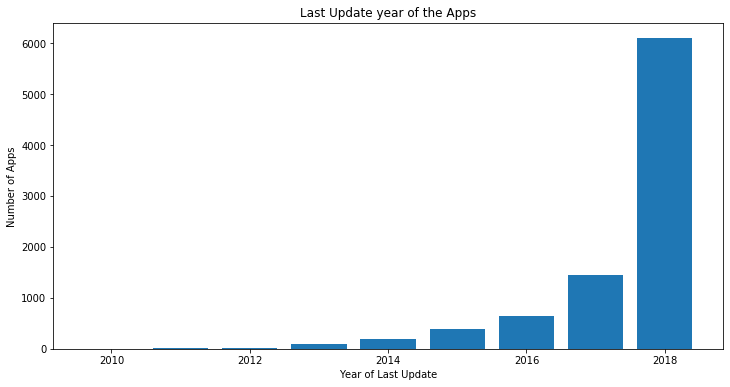

In [26]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.bar(updates_df['Last Updated'], updates_df['App'])
ax.set_xlabel('Year of Last Update')
ax.set_ylabel('Number of Apps')
ax.set_title('Last Update year of the Apps')
plt.show()

I will consider any update before 2016 is an old application.

In [27]:
# Apps before 2016
df[df['Last Updated'].dt.year < 2016]['App']

58                   Restart Navigator
144                        Cool Reader
170                            Flybook
209                    Plugin:AOT v5.0
384      Hangouts Dialer - Call Phones
                     ...              
10817             HTC Sense Input - FR
10830                News Minecraft.fr
10832                         FR Tides
10833                      Chemin (fr)
10839    The SCP Foundation DB fr nn5n
Name: App, Length: 696, dtype: object

## App With the Largest Num of Installs
A clear representation of your results. You can also come up with the top list of the most installed apps. These can be represented on a horizontal bar graph.

In [28]:
# The top list of the most installed apps
top_installed = df.sort_values(by = 'Installs Num', ascending = False).head(50)

In [29]:
top_installed[['Installs Num','App']]

Installs Num                                       App
5395    1000000000                             Google Photos
391     1000000000             Skype - free IM & video calls
3816    1000000000                               Google News
2853    1000000000                             Google Photos
3234    1000000000                                    Google
3909    1000000000                                 Instagram
3223    1000000000                 Maps - Navigate & Explore
3736    1000000000                               Google News
3687    1000000000                   Google Play Movies & TV
411     1000000000              Google Chrome: Fast & Secure
2884    1000000000                             Google Photos
3127    1000000000                        Google Street View
865     1000000000                         Google Play Games
386     1000000000                                  Hangouts
382     1000000000  Messenger – Text and Video Chat for Free
3117    1000000000                 Maps - Navigate & Explore
5856    1000000000                         Google Play Games
2808    1000000000                             Google Photos
1872    1000000000                            Subway Surfers
451     1000000000                                     Gmail
2604    1000000000                                 Instagram
3454    1000000000                              Google Drive
3904    1000000000                        WhatsApp Messenger
2554    1000000000                                   Google+
3928    1000000000                                   YouTube
3896    1000000000                            Subway Surfers
1750    1000000000                            Subway Surfers
1700    1000000000                            Subway Surfers
9844    1000000000                               Google News
3943    1000000000                                  Facebook
2545    1000000000                                 Instagram
2544    1000000000                                  Facebook
152     1000000000                         Google Play Books
3996    1000000000              Google Chrome: Fast & Secure
3523    1000000000                              Google Drive
3232    1000000000                        Google Street View
464     1000000000                                  Hangouts
4098    1000000000                 Maps - Navigate & Explore
340     1000000000                                     Gmail
4150    1000000000                                    Google
4144    1000000000                                   Google+
338     1000000000              Google Chrome: Fast & Secure
4153    1000000000                                  Hangouts
341     1000000000                                  Hangouts
1654    1000000000                            Subway Surfers
336     1000000000                        WhatsApp Messenger
335     1000000000  Messenger – Text and Video Chat for Free
4170    1000000000                              Google Drive
3665    1000000000                                   YouTube
1705     500000000                          Candy Crush Saga

## App With Large Number of Reviews
A clear representation of your results. You can also come up with the top 10 list of apps that have many reviews.

In [30]:
# The top 10 list of apps that have many reviews.
top10_reviewed = df.sort_values(by = 'Reviews', ascending = False).head(10)

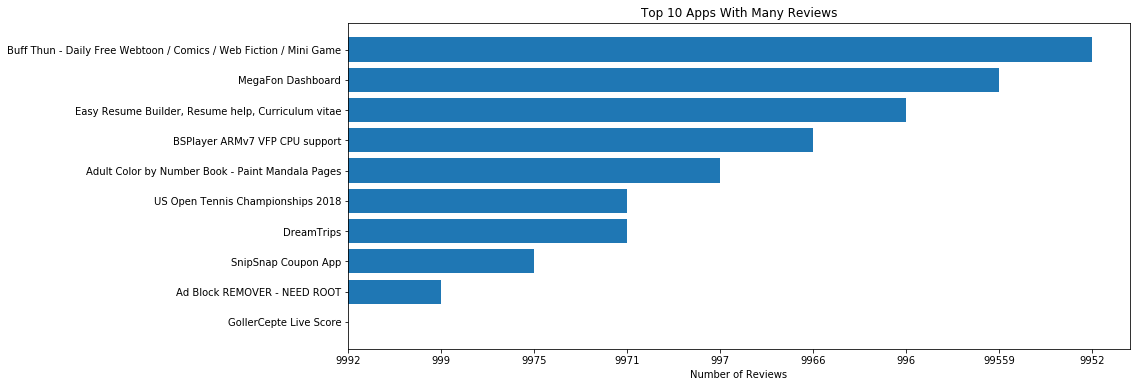

In [31]:
# Show chart with the top 10 list of apps that have many reviews.
fig, ax = plt.subplots(figsize = (14, 6))
ax.barh(top10_reviewed['App'], top10_reviewed['Reviews'])
ax.set_xlabel('Number of Reviews')
ax.set_title('Top 10 Apps With Many Reviews')
plt.show()

## Paid vs Free

In [32]:
# The number of the paid and free apps
df_types = pd.DataFrame(df.groupby(['Type']).count()['App']).reset_index()
df_types

Type   App
0  Free  8275
1  Paid   611

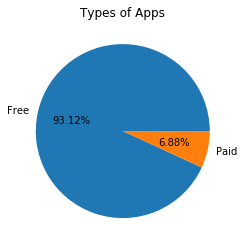

In [33]:
# Chart shows the percentage of the paid and free apps
fig, ax = plt.subplots()
ax.pie(df_types['App']/df.shape[0], labels = df_types['Type'], autopct='%1.2f%%') 
ax.set_title('Types of Apps')
plt.show()

In [34]:
# The number of the free apps in each category
df[df['Type'] == 'Free'].groupby(['Category']).count()['App']

Category
ART_AND_DESIGN           58
AUTO_AND_VEHICLES        72
BEAUTY                   42
BOOKS_AND_REFERENCE     169
BUSINESS                261
COMICS                   58
COMMUNICATION           285
DATING                  155
EDUCATION               125
ENTERTAINMENT           109
EVENTS                   45
FAMILY                 1560
FINANCE                 304
FOOD_AND_DRINK          104
GAME                    997
HEALTH_AND_FITNESS      251
HOUSE_AND_HOME           68
LIBRARIES_AND_DEMO       64
LIFESTYLE               287
MAPS_AND_NAVIGATION     119
MEDICAL                 238
NEWS_AND_MAGAZINES      212
PARENTING                48
PERSONALIZATION         243
PHOTOGRAPHY             288
PRODUCTIVITY            316
SHOPPING                200
SOCIAL                  242
SPORTS                  264
TOOLS                   670
TRAVEL_AND_LOCAL        197
VIDEO_PLAYERS           156
WEATHER                  68
Name: App, dtype: int64

In [35]:
# The number of the paid apps in each category
df[df['Type'] == 'Paid'].groupby(['Category']).count()['App']

Category
ART_AND_DESIGN           3
AUTO_AND_VEHICLES        1
BOOKS_AND_REFERENCE      8
BUSINESS                 9
COMMUNICATION           22
DATING                   4
EDUCATION                4
ENTERTAINMENT            2
FAMILY                 157
FINANCE                 13
FOOD_AND_DRINK           2
GAME                    77
HEALTH_AND_FITNESS      11
LIFESTYLE               18
MAPS_AND_NAVIGATION      5
MEDICAL                 64
NEWS_AND_MAGAZINES       2
PARENTING                2
PERSONALIZATION         65
PHOTOGRAPHY             16
PRODUCTIVITY            18
SHOPPING                 2
SOCIAL                   2
SPORTS                  22
TOOLS                   63
TRAVEL_AND_LOCAL         8
VIDEO_PLAYERS            4
WEATHER                  7
Name: App, dtype: int64

In [36]:
# Remove '$' from the price
df['Price'] = pd.to_numeric(df['Price'].apply(lambda x: x.strip('$')))

In [37]:
# The maximum price
df[df['Type'] == 'Paid']['Price'].max()

400.0

In [38]:
# The minimum price
df[df['Type'] == 'Paid']['Price'].min()

0.99

In [39]:
# The average of the prices
df[df['Type'] == 'Paid']['Price'].mean()

14.012913256955667

 ## Apps With Highest Number of Rating

In [40]:
hi_rate_df = df[df['Rating'] == df['Rating'].max()]
hi_rate_df

App   Category  Rating Reviews  \
329                  Hojiboy Tojiboyev Life Hacks     COMICS     5.0      15   
612                 American Girls Mobile Numbers     DATING     5.0       5   
615                                  Awake Dating     DATING     5.0       2   
633                         Spine- The dating app     DATING     5.0       5   
636    Girls Live Talk - Free Text and Video Chat     DATING     5.0       6   
...                                           ...        ...     ...     ...   
10721                           Mad Dash Fo' Cash       GAME     5.0      14   
10742                       GKPB FP Online Church  LIFESTYLE     5.0      32   
10776                            Monster Ride Pro       GAME     5.0       1   
10820                             Fr. Daoud Lamei     FAMILY     5.0      22   
10837            Fr. Mike Schmitz Audio Teachings     FAMILY     5.0       4   

       Size Installs  Type  Price Content Rating     Genres Last Updated  \
329     37M   1,000+  Free    0.0       Everyone     Comics   2018-06-26   
612    4.4M   1,000+  Free    0.0     Mature 17+     Dating   2018-07-17   
615     70M     100+  Free    0.0     Mature 17+     Dating   2018-07-24   
633    9.3M     500+  Free    0.0           Teen     Dating   2018-07-14   
636    5.0M     100+  Free    0.0     Mature 17+     Dating   2018-08-01   
...     ...      ...   ...    ...            ...        ...          ...   
10721   16M     100+  Free    0.0       Everyone     Arcade   2017-06-19   
10742  7.9M   1,000+  Free    0.0       Everyone  Lifestyle   2017-12-31   
10776   24M      10+  Free    0.0       Everyone     Racing   2018-03-05   
10820  8.6M   1,000+  Free    0.0           Teen  Education   2018-06-27   
10837  3.6M     100+  Free    0.0       Everyone  Education   2018-07-06   

      Current Ver   Android Ver  Installs Num     Size2  
329           2.0  4.0.3 and up          1000  37000000  
612           3.0  4.0.3 and up          1000  44000000  
615         2.2.9    4.4 and up           100  70000000  
633           4.0  4.0.3 and up           500  93000000  
636           8.2  4.0.3 and up           100   5000000  
...           ...           ...           ...       ...  
10721        2.5a    4.1 and up           100  16000000  
10742       0.7.1    4.4 and up          1000  79000000  
10776         2.0    2.3 and up            10  24000000  
10820       3.8.0    4.1 and up          1000  86000000  
10837         1.0    4.1 and up           100  36000000  

[271 rows x 15 columns]

In [41]:
hi_rate_df2 = pd.DataFrame(hi_rate_df.groupby(['Category'])['App'].count()).reset_index()

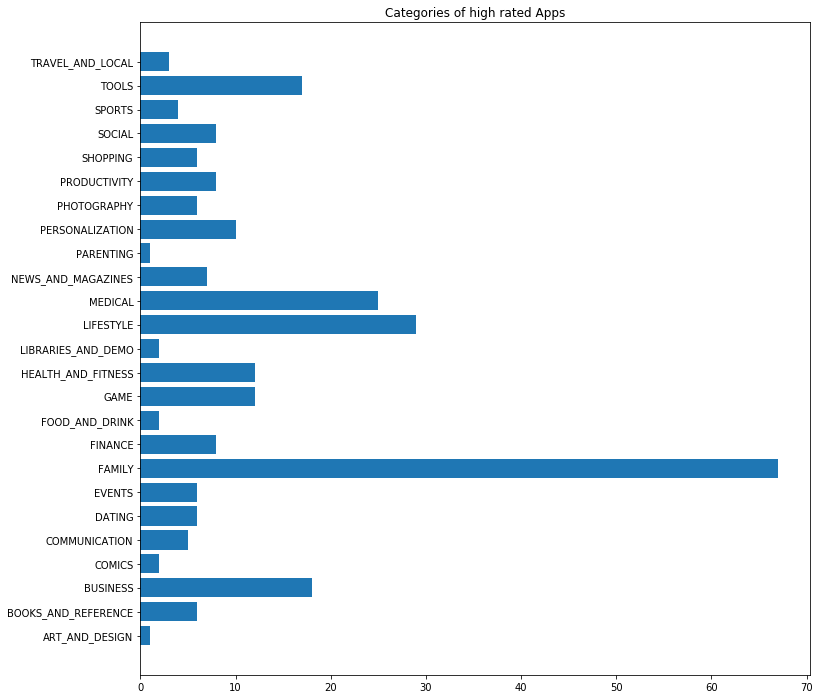

In [42]:
# Show categories of high rated Apps
fig, ax = plt.subplots(figsize = (12, 12))
ax.barh(hi_rate_df2['Category'], hi_rate_df2['App']) 
ax.set_title('Categories of high rated Apps')
plt.show()

## Predicting App Rating
Using machine learning models that predict the Apps rating.

### Features Engineering

In [43]:
# One hot encoding for Category column
new_df = pd.concat([df, pd.get_dummies(df['Category'], prefix ='cat')], axis = 1)
new_df = new_df.drop(['Category'], axis = 1)
new_df.head()

App  Rating Reviews  Size  \
0     Photo Editor & Candy Camera & Grid & ScrapBook     4.1     159   19M   
1                                Coloring book moana     3.9     967   14M   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...     4.7   87510  8.7M   
3                              Sketch - Draw & Paint     4.5  215644   25M   
4              Pixel Draw - Number Art Coloring Book     4.3     967  2.8M   

      Installs  Type  Price Content Rating                     Genres  \
0      10,000+  Free    0.0       Everyone               Art & Design   
1     500,000+  Free    0.0       Everyone  Art & Design;Pretend Play   
2   5,000,000+  Free    0.0       Everyone               Art & Design   
3  50,000,000+  Free    0.0           Teen               Art & Design   
4     100,000+  Free    0.0       Everyone    Art & Design;Creativity   

  Last Updated  ... cat_PERSONALIZATION cat_PHOTOGRAPHY  cat_PRODUCTIVITY  \
0   2018-01-07  ...                   0               0                 0   
1   2018-01-15  ...                   0               0                 0   
2   2018-08-01  ...                   0               0                 0   
3   2018-06-08  ...                   0               0                 0   
4   2018-06-20  ...                   0               0                 0   

   cat_SHOPPING  cat_SOCIAL  cat_SPORTS  cat_TOOLS  cat_TRAVEL_AND_LOCAL  \
0             0           0           0          0                     0   
1             0           0           0          0                     0   
2             0           0           0          0                     0   
3             0           0           0          0                     0   
4             0           0           0          0                     0   

   cat_VIDEO_PLAYERS  cat_WEATHER  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  

[5 rows x 47 columns]

In [44]:
# One hot encoding for Type column
new_df = pd.concat([new_df, pd.get_dummies(df['Type'], prefix ='type')], axis = 1)
new_df = new_df.drop(['Type'], axis = 1)
new_df.head()

App  Rating Reviews  Size  \
0     Photo Editor & Candy Camera & Grid & ScrapBook     4.1     159   19M   
1                                Coloring book moana     3.9     967   14M   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...     4.7   87510  8.7M   
3                              Sketch - Draw & Paint     4.5  215644   25M   
4              Pixel Draw - Number Art Coloring Book     4.3     967  2.8M   

      Installs  Price Content Rating                     Genres Last Updated  \
0      10,000+    0.0       Everyone               Art & Design   2018-01-07   
1     500,000+    0.0       Everyone  Art & Design;Pretend Play   2018-01-15   
2   5,000,000+    0.0       Everyone               Art & Design   2018-08-01   
3  50,000,000+    0.0           Teen               Art & Design   2018-06-08   
4     100,000+    0.0       Everyone    Art & Design;Creativity   2018-06-20   

          Current Ver  ... cat_PRODUCTIVITY  cat_SHOPPING  cat_SOCIAL  \
0               1.0.0  ...                0             0           0   
1               2.0.0  ...                0             0           0   
2               1.2.4  ...                0             0           0   
3  Varies with device  ...                0             0           0   
4                 1.1  ...                0             0           0   

   cat_SPORTS  cat_TOOLS  cat_TRAVEL_AND_LOCAL  cat_VIDEO_PLAYERS  \
0           0          0                     0                  0   
1           0          0                     0                  0   
2           0          0                     0                  0   
3           0          0                     0                  0   
4           0          0                     0                  0   

   cat_WEATHER  type_Free  type_Paid  
0            0          1          0  
1            0          1          0  
2            0          1          0  
3            0          1          0  
4            0          1          0  

[5 rows x 48 columns]

In [45]:
# Create LabelEncoder variable
le = preprocessing.LabelEncoder()

In [46]:
# Encoding
new_df['Content Rating'] = le.fit_transform(new_df['Content Rating'])
new_df['Genres'] = le.fit_transform(new_df['Genres'])
new_df['Android Ver'] = le.fit_transform(new_df['Android Ver'])
new_df['Last Updated'] = new_df['Last Updated'].dt.year

In [47]:
new_df.head()

App  Rating Reviews  Size  \
0     Photo Editor & Candy Camera & Grid & ScrapBook     4.1     159   19M   
1                                Coloring book moana     3.9     967   14M   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...     4.7   87510  8.7M   
3                              Sketch - Draw & Paint     4.5  215644   25M   
4              Pixel Draw - Number Art Coloring Book     4.3     967  2.8M   

      Installs  Price  Content Rating  Genres  Last Updated  \
0      10,000+    0.0               1       9          2018   
1     500,000+    0.0               1      11          2018   
2   5,000,000+    0.0               1       9          2018   
3  50,000,000+    0.0               4       9          2018   
4     100,000+    0.0               1      10          2018   

          Current Ver  ...  cat_PRODUCTIVITY  cat_SHOPPING  cat_SOCIAL  \
0               1.0.0  ...                 0             0           0   
1               2.0.0  ...                 0             0           0   
2               1.2.4  ...                 0             0           0   
3  Varies with device  ...                 0             0           0   
4                 1.1  ...                 0             0           0   

   cat_SPORTS  cat_TOOLS  cat_TRAVEL_AND_LOCAL  cat_VIDEO_PLAYERS  \
0           0          0                     0                  0   
1           0          0                     0                  0   
2           0          0                     0                  0   
3           0          0                     0                  0   
4           0          0                     0                  0   

   cat_WEATHER  type_Free  type_Paid  
0            0          1          0  
1            0          1          0  
2            0          1          0  
3            0          1          0  
4            0          1          0  

[5 rows x 48 columns]

In [48]:
# Drop not needed columns
new_df = new_df.drop(['Installs', 'Size', 'App', 'Current Ver'], axis = 1)
new_df

Rating Reviews  Price  Content Rating  Genres  Last Updated  \
0         4.1     159    0.0               1       9          2018   
1         3.9     967    0.0               1      11          2018   
2         4.7   87510    0.0               1       9          2018   
3         4.5  215644    0.0               4       9          2018   
4         4.3     967    0.0               1      10          2018   
...       ...     ...    ...             ...     ...           ...   
10834     4.0       7    0.0               1      37          2017   
10836     4.5      38    0.0               1      37          2017   
10837     5.0       4    0.0               1      37          2018   
10839     4.5     114    0.0               3      18          2015   
10840     4.5  398307    0.0               1      65          2018   

       Android Ver  Installs Num     Size2  cat_ART_AND_DESIGN  ...  \
0               14         10000  19000000                   1  ...   
1               14        500000  14000000                   1  ...   
2               14       5000000  87000000                   1  ...   
3               17      50000000  25000000                   1  ...   
4               19        100000  28000000                   1  ...   
...            ...           ...       ...                 ...  ...   
10834           16           500  26000000                   0  ...   
10836           16          5000  53000000                   0  ...   
10837           16           100  36000000                   0  ...   
10839           30          1000         1                   0  ...   
10840           30      10000000  19000000                   0  ...   

       cat_PRODUCTIVITY  cat_SHOPPING  cat_SOCIAL  cat_SPORTS  cat_TOOLS  \
0                     0             0           0           0          0   
1                     0             0           0           0          0   
2                     0             0           0           0          0   
3                     0             0           0           0          0   
4                     0             0           0           0          0   
...                 ...           ...         ...         ...        ...   
10834                 0             0           0           0          0   
10836                 0             0           0           0          0   
10837                 0             0           0           0          0   
10839                 0             0           0           0          0   
10840                 0             0           0           0          0   

       cat_TRAVEL_AND_LOCAL  cat_VIDEO_PLAYERS  cat_WEATHER  type_Free  \
0                         0                  0            0          1   
1                         0                  0            0          1   
2                         0                  0            0          1   
3                         0                  0            0          1   
4                         0                  0            0          1   
...                     ...                ...          ...        ...   
10834                     0                  0            0          1   
10836                     0                  0            0          1   
10837                     0                  0            0          1   
10839                     0                  0            0          1   
10840                     0                  0            0          1   

       type_Paid  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
10834          0  
10836          0  
10837          0  
10839          0  
10840          0  

[8886 rows x 44 columns]

In [49]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rating                   8886 non-null   float64
 1   Reviews                  8886 non-null   object 
 2   Price                    8886 non-null   float64
 3   Content Rating           8886 non-null   int32  
 4   Genres                   8886 non-null   int32  
 5   Last Updated             8886 non-null   int64  
 6   Android Ver              8886 non-null   int32  
 7   Installs Num             8886 non-null   int64  
 8   Size2                    8886 non-null   int64  
 9   cat_ART_AND_DESIGN       8886 non-null   uint8  
 10  cat_AUTO_AND_VEHICLES    8886 non-null   uint8  
 11  cat_BEAUTY               8886 non-null   uint8  
 12  cat_BOOKS_AND_REFERENCE  8886 non-null   uint8  
 13  cat_BUSINESS             8886 non-null   uint8  
 14  cat_COMICS             

In [50]:
# Determine features and target (label)
y = new_df['Rating']
X = new_df.drop(['Rating'], axis = 1)

### Split Data

In [51]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Train and Test Models

In [57]:
# A function for tarin and test model
def train_test(X_train, X_test, y_train, y_test, clf):
    
    # Fit the model
    clf.fit(X_train, y_train)
    
    # Test the model
    pred = clf.predict(X_test)
    
    # Print metrics
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
    print('R2:', metrics.r2_score(y_test, pred))
    print()
    
    # Return actual and predicted Rating
    return(pd.DataFrame({'Actual_Rating' : y_test, 'Predicted_Rating' : pred}))


#### 1. Random Forest Regressor

In [58]:
# Create RandomForestRegressor classifier, and training and testing it
rfr = RandomForestRegressor(random_state = 0)
train_test(X_train, X_test, y_train, y_test, rfr)

Mean Absolute Error: 0.3198739675397718
Mean Squared Error: 0.23396475378848053
Root Mean Squared Error: 0.48369903223851973
R2: 0.18056455100808932



Actual_Rating  Predicted_Rating
3550             4.4             4.397
5982             4.6             4.642
9593             4.3             4.601
10518            3.8             3.785
9360             4.4             4.315
...              ...               ...
4331             3.1             3.905
3266             3.5             4.014
1785             4.4             4.398
1738             4.7             4.686
8309             4.3             4.014

[1778 rows x 2 columns]

#### 2. Gradient Boosting Regressor

In [59]:
# Create GradientBoostingRegressor classifier, and training and testing it
gbr = GradientBoostingRegressor(random_state = 0)
train_test(X_train, X_test, y_train, y_test, gbr)

Mean Absolute Error: 0.33115431214276514
Mean Squared Error: 0.2399334066482132
Root Mean Squared Error: 0.4898299772862143
R2: 0.15966001023091902



Actual_Rating  Predicted_Rating
3550             4.4          4.350963
5982             4.6          4.515510
9593             4.3          4.312320
10518            3.8          4.137926
9360             4.4          4.058364
...              ...               ...
4331             3.1          3.963040
3266             3.5          4.221380
1785             4.4          4.392714
1738             4.7          4.406882
8309             4.3          4.225101

[1778 rows x 2 columns]

### Tuning Models

In [60]:
# Use Grid search and find the best parameters
def find_best_param(X_train, X_test, y_train, y_test, clf, parameters):
        
        # Perform grid search on the classifier
        gs = GridSearchCV(clf, parameters, verbose = 2)
        
        # Fit the grid search object to the training data 
        grid_fit = gs.fit(X_train, y_train)
        
        # Get estimator
        best_clf = grid_fit.best_estimator_
        
        # Test the model 
        pred = best_clf.predict(X_test)
        
        # Print best parameters
        print('Best Params:', gs.best_params_)  
        print()
        
        # Print metrics
        print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
        print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
        print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
        print('R2:', metrics.r2_score(y_test, pred))
        print()
        

#### 1. Random Forest Regressor

In [61]:
# Create a dictionary of parameters for RandomForestRegressor
rfr_parameters = [{'bootstrap': [True, False], 'max_depth' : [3, 5, 10, 20, 30], 'min_samples_leaf' : [2, 3, 4],
               'max_features': ['auto', 'sqrt'], 'min_samples_split' : [2, 3, 4, 5], 
               'n_estimators' : [10, 20, 50, 100, 200, 400]} ]

In [62]:
# Grid search
find_best_param(X_train, X_test, y_train, y_test, rfr, rfr_parameters)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=3, max_features=auto

[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=20, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=20, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=20, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=50, total=   0.3s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=True, max_depth=3, max_features=auto

[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50, total=   0.3s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50, total=   0.3s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50, total=   0.3s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=True, max_depth=3, max_features=a

[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   1.0s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=3, max_featu

[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   1.0s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   1.0s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   1.0s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=400, total=   1.9s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=3, max_featu

[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=400, total=   2.0s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=400 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=400, total=   1.9s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=400 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=400, total=   2.0s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=10 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=10 
[CV]  bootstrap=True, max_depth=3, max_features

[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=20, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=20, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=True, max_depth=3, max_features=auto

[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, total=   0.3s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, total=   0.3s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=True, max_depth=3, max_features=auto

[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=50, total=   0.3s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=50, total=   0.3s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=True, max_depth=3, max_features

[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.6s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.6s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   1.2s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   1.2s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=3, max_featu

[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   1.0s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   1.0s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400, total=   2.0s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400, total=   2.1s
[CV] bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=True, max_depth=3, max_featu

[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   0.7s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   0.7s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=True, max_depth=3, max_features=s

[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt

[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt

[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=3, max_featu

[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=True, max_depth=3, max_featu

[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400, total=   0.7s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400, total=   0.7s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400, total=   0.8s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400, total=   0.7s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400 
[CV]  bootstrap=True, max_depth=3, max_featu

[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt

[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=20, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=50, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=50, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=50, total=   0.1s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt

[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=True, max_depth=3, max_featu

[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=3, max_featu

[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   3.0s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   3.0s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   2.9s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   2.9s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=5, max_featu

[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, max_features=auto

[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=20, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=20, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=20, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, total=   0.4s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=auto

[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=50, total=   0.4s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=50, total=   0.4s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=50, total=   0.4s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100, total=   0.8s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=5, max_features=a

[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=100, total=   0.7s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=100, total=   0.7s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=100, total=   0.7s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=200, total=   1.4s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=True, max_depth=5, max_featu

[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=200, total=   1.5s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=200, total=   1.5s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=200, total=   1.6s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=400 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=400, total=   3.3s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=400 
[CV]  bootstrap=True, max_depth=5, max_featu

[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=400, total=   2.9s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=400, total=   2.9s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=400, total=   2.9s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features

[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=10, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=10, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=10, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=20, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, max_features=auto

[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=20, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=20, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=20, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.5s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=auto

[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   0.4s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   0.4s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   0.4s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=   0.7s
[CV] bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=5, max_features=a

[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=5, max_featu

[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   0.5s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400, total=   0.9s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400 
[CV]  bootstrap=True, max_depth=5, max_featu

[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400, total=   0.8s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400, total=   0.8s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400, total=   0.9s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=True, max_depth=5, max_features

[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt

[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=50, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=50, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=50, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=50, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt

[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=True, max_depth=5, max_featu

[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=200, total=   0.5s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=5, max_featu

[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   0.8s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   0.8s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   0.8s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   0.8s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=5, max_featu

[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt

[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=5, max_features=sqr

[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   1.3s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   1.3s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   1.4s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   1.3s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, 

[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   2.6s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   2.6s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   2.6s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   2.6s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=400 
[CV]  bootstrap=True, max_depth=10, 

[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=400, total=   6.3s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=400 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=400, total=   5.8s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=400 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=400, total=   5.2s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=400 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=400, total=   5.2s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=True, max_depth=10, m

[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=10, max_feat

[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=20, total=   0.5s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=20, total=   0.5s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=20, total=   0.5s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=20, total=   0.5s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=True, max_depth=10, max_feat

[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=50, total=   0.8s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=50, total=   0.8s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=50, total=   0.8s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=50, total=   0.8s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, max_fea

[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   1.6s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   1.6s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   1.6s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   1.5s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, 

[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   2.9s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   2.9s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   2.9s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   2.9s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=10, 

[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=400, total=   6.2s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=400 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=400, total=   5.9s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=400 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=400, total=   6.1s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=400 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=400, total=   7.6s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  bootstrap=True, max_depth=10, m

[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, total=   0.2s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, total=   0.2s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, total=   0.2s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, total=   0.2s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=True, max_depth=10, max_feat

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=True, max_depth=10, max_feat

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50, total=   0.2s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50, total=   0.2s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50, total=   0.2s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50, total=   0.2s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, max_fea

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, 

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.7s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   1.0s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.8s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   1.0s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=True, max_depth=10, 

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400, total=   1.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400, total=   1.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400, total=   1.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400, total=   1.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=True, max_depth=10, m

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=10 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  bootstrap=True, max_depth=10, max_feat

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=20, total=   0.1s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50, total=   0.2s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50, total=   0.2s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50, total=   0.2s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=True, max_depth=10, max_feat

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, 

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200, total=   0.7s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200, total=   0.7s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200, total=   0.7s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200, total=   0.7s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, 

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=400, total=   1.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=400 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=400, total=   1.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=400 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=400, total=   1.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=400 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=400, total=   1.3s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=400 
[CV]  bootstrap=True, max_depth=10, 

[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.2s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.2s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.3s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.3s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=20, max_feat

[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=20, total=   0.4s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=20, total=   0.4s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=20, total=   0.5s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=20, total=   0.4s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=20, max_feat

[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50, total=   1.0s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50, total=   1.1s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50, total=   1.1s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50, total=   1.1s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=20, max_feat

[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   3.0s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   2.7s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   2.6s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   2.2s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=20, 

[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   3.9s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   3.8s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   3.8s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   3.7s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=20, 

[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=400, total=   7.7s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=400 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=400, total=   7.9s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=400 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=400, total=   7.6s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=400 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=400, total=   7.5s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=400 
[CV]  bootstrap=True, max_depth=20, 

[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10, total=   0.2s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10, total=   0.2s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10, total=   0.2s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10, total=   0.2s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=True, max_depth=20, max_feat

[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20, total=   0.4s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20, total=   0.4s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20, total=   0.4s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20, total=   0.4s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=20, max_feat

[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=50, total=   0.9s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=50, total=   0.9s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=50, total=   0.9s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=50, total=   0.9s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=True, max_depth=20, max_feat

[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   1.8s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   1.8s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   1.8s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   1.8s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=True, max_depth=20, 

[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   3.8s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   3.5s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   4.4s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   4.6s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=20, 

[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   2.1s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   2.0s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   2.0s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   1.9s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=20, 

[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  bootstrap=True, max_depth=20, max_feat

[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20, total=   0.1s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20, total=   0.1s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20, total=   0.1s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50, total=   0.3s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=True, max_depth=20, max_feat

[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=50, total=   0.2s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=50, total=   0.2s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=50, total=   0.2s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=20, max_f

[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200, total=   0.9s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=True, max_depth=20, 

[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200, total=   1.1s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200, total=   0.9s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200, total=   0.9s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400, total=   1.8s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400 
[CV]  bootstrap=True, max_depth=20, 

[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=400, total=   1.8s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=400, total=   1.8s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=400, total=   1.9s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=20, max

[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=10, total=   0.1s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=10, total=   0.1s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=20, total=   0.1s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=20, total=   0.1s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=True, max_depth=20, max_feat

[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.2s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.2s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.2s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_depth=20, max_feat

[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   0.2s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=20, m

[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   2.1s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   4.2s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   4.1s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   4.4s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=30, 

[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   4.1s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=400 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=400, total=   8.4s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=400 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=400, total=   8.4s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=400 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=400, total=   8.4s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=400 
[CV]  bootstrap=True, max_depth=30, 

[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=400, total=   9.6s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   0.3s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   0.3s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   0.3s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=True, max_depth=30, max_fea

[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=10, total=   0.3s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=20, total=   0.5s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=20, total=   0.5s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=20, total=   0.5s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=30, max_feat

[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=20, total=   0.5s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50, total=   1.1s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50, total=   1.1s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50, total=   1.1s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=True, max_depth=30, max_feat

[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=50, total=   2.9s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   6.4s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   5.5s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   5.5s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=True, max_depth=30, m

[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   5.0s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200, total=  10.4s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200, total=  10.9s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200, total=  10.0s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=30, 

[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=  10.0s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=  20.1s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=  20.4s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=  20.5s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=30, 

[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=400, total=  20.8s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.7s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.7s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.8s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  bootstrap=True, max_depth=30, max_fea

[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, total=   0.5s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20, total=   1.1s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20, total=   1.2s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20, total=   0.8s
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=True, max_depth=30, max_feat

[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   0.3s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, total=   0.8s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, total=   0.8s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, total=   0.6s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=True, max_depth=30, max_feat

[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50, total=   0.8s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100, total=   1.6s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100, total=   1.6s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100, total=   1.6s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=True, max_depth=30, m

[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   1.6s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   3.1s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   3.1s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   3.1s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=30, 

[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   3.0s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400, total=   6.0s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400, total=   6.0s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400, total=   6.0s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=True, max_depth=30, 

[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400, total=   5.9s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=10, total=   0.2s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=10, total=   0.2s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=10, total=   0.2s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=True, max_depth=30, max_fea

[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=10, total=   0.2s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=10 
[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=10, total=   0.2s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=20, total=   0.3s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=20, total=   0.3s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  bootstrap=True, max_depth=30, max_feat

[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=20, total=   0.3s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=20, total=   0.3s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50, total=   0.7s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50, total=   0.7s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=True, max_depth=30, max_feat

[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50, total=   0.7s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50, total=   0.7s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   1.3s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   1.3s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=30, max

[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=100, total=   1.3s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=100, total=   1.3s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200, total=   2.6s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200, total=   2.5s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=True, max_depth=30, 

[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   2.6s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   2.5s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=400 
[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=400, total=   4.9s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=400 
[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=400, total=   6.6s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=400 
[CV]  bootstrap=True, max_depth=30, 

[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400, total=   4.8s
[CV] bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400, total=   5.0s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.2s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.2s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=3, max_f

[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=10, total=   0.2s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=10, total=   0.2s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=20, total=   0.4s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=20, total=   0.4s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=3, max_feat

[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.5s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.4s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50, total=   1.0s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50, total=   1.0s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=3, max_feat

[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, total=   1.0s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, total=   1.0s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   1.9s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   1.9s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=False, max_depth=3, max

[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100, total=   1.9s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100, total=   2.9s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   3.9s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   3.8s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=3, 

[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=200, total=   3.5s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=200, total=   3.2s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=400 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=400, total=   6.1s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=400 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=400, total=   6.8s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=400 
[CV]  bootstrap=False, max_depth=3, 

[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=400, total=   7.1s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=400 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=400, total=   6.8s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10, total=   0.2s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=False, max_depth=3, max_f

[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, total=   0.2s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, total=   0.2s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20, total=   0.3s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20, total=   0.3s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=3, max_feat

[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=20, total=   0.4s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=20, total=   0.4s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=50, total=   1.0s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=50, total=   1.0s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=False, max_depth=3, max_feat

[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   1.0s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   1.0s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   1.9s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   1.9s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=False, max_depth=3, max

[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=   1.9s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=   1.9s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   3.7s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   3.7s
[CV] bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=3, 

[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   1.0s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   1.0s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   1.9s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   1.9s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=3, 

[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400, total=   1.9s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400, total=   1.9s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  bootstrap=False, max_depth=3, max_f

[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20, total=   0.1s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20, total=   0.1s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20, total=   0.1s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20, total=   0.1s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=False, max_depth=3, max_feat

[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=50, total=   0.3s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=50, total=   0.3s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=50, total=   0.3s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=50, total=   0.3s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, max_depth=3, max_feat

[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100, total=   0.6s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100, total=   0.6s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=False, max_depth=3, 

[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200, total=   1.0s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200, total=   1.0s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200, total=   1.0s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200, total=   0.9s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=False, max_depth=3, 

[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=400, total=   1.8s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=400, total=   1.9s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=400, total=   1.9s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=400, total=   1.9s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=False, max_depth=3, 

[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=10, total=   0.1s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=10, total=   0.1s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=10, total=   0.1s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=20, total=   0.2s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=3, max_feat

[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.3s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=3, max_feat

[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   0.3s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   0.3s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   0.3s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=   0.5s
[CV] bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=False, max_depth=3, max_f

[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   3.0s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   3.0s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   3.0s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   5.9s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=5, 

[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   5.8s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   5.8s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   5.7s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=400 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=400, total=  11.8s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=400 
[CV]  bootstrap=False, max_depth=5, 

[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=400, total=  13.1s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=400 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=400, total=  12.4s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=400 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=400, total=  12.8s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   0.3s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=False, max_depth=5, max

[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=10, total=   0.4s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=10, total=   0.4s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=10, total=   0.4s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=20, total=   0.6s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, max_feat

[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=20, total=   0.7s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=20, total=   0.7s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=20, total=   0.8s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50, total=   1.6s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_feat

[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=50, total=   1.9s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=50, total=   1.9s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=50, total=   1.6s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   3.4s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=False, max_depth=5, max_f

[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   3.4s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   3.0s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   2.8s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200, total=   6.7s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=5, 

[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   5.7s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   5.8s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   6.7s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=  11.9s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=5, 

[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=400, total=  11.9s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=400 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=400, total=  11.6s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=400 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=400, total=  11.9s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.4s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  bootstrap=False, max_depth=5, max

[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, total=   0.4s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, total=   0.4s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, total=   0.4s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20, total=   0.8s
[CV] bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, max_feat

[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   0.2s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   0.2s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   0.2s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, total=   0.4s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_feat

[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50, total=   0.4s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50, total=   0.4s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50, total=   0.4s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=False, max_depth=5, max_f

[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   1.3s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=False, max_depth=5, 

[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   1.5s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   1.3s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   1.5s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400, total=   2.7s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=False, max_depth=5, 

[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400, total=   2.5s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400, total=   2.5s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400, total=   2.5s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=10, total=   0.1s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=False, max_depth=5, max

[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=10 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=20, total=   0.2s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=20, total=   0.2s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, max_feat

[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=20, total=   0.1s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50, total=   0.3s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50, total=   0.4s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50, total=   0.4s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=False, max_depth=5, max_feat

[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50, total=   0.4s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=False, max_depth=5, m

[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200, total=   1.3s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200, total=   1.3s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200, total=   1.4s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=False, max_depth=5, 

[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   1.3s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=400 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=400, total=   2.5s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=400 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=400, total=   2.6s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=400 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=400, total=   2.6s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=400 
[CV]  bootstrap=False, max_depth=5, 

[CV]  bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400, total=   2.6s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.6s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.6s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.6s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=10,

[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=10, total=   0.6s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=10, total=   0.6s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=20, total=   1.1s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=20, total=   1.2s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=10,

[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   1.4s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   1.5s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   1.5s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50, total=   3.6s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=10,

[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, total=   2.8s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, total=   2.8s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, total=   2.8s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, total=   2.8s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=False, max_depth=10

[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100, total=   5.5s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100, total=   5.5s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100, total=   5.5s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100, total=   5.5s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=False, max_d

[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=100, total=   5.3s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=200, total=  11.5s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=200, total=  12.6s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=200, total=  12.6s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=False, max_d

[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=200, total=   9.8s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=200, total=  10.6s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=400 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=400, total=  21.0s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=400 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=400, total=  21.4s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=400 
[CV]  bootstrap=False, max_d

[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=400, total=  22.1s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=400, total=  21.8s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=400, total=  22.1s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, total=   0.6s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=False, max_dept

[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=10, total=   0.6s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=10, total=   0.6s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=10, total=   0.6s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=10, total=   0.6s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=20 
[CV]  bootstrap=False, max_depth=10,

[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=20, total=   1.0s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=20, total=   1.0s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=20, total=   1.1s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=20, total=   0.8s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  bootstrap=False, max_depth=10,

[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20, total=   1.0s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   2.9s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   2.9s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   2.8s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=False, max_depth=10,

[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, total=   0.6s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, total=   0.6s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   1.1s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   1.1s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=False, max_dept

[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100, total=   0.8s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100, total=   1.0s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   1.9s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=False, max_d

[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   2.3s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   2.4s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   2.2s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   2.3s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400 
[CV]  bootstrap=False, max_d

[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400, total=   4.2s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400, total=   4.3s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400, total=   4.1s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400, total=   4.3s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=False, max_d

[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400, total=   4.2s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=10, total=   0.2s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=10, total=   0.1s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=10, total=   0.1s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=False, max_depth=10

[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=10 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=20, total=   0.2s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=20, total=   0.3s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  bootstrap=False, max_depth=10,

[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=20, total=   0.3s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=20, total=   0.3s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=20, total=   0.3s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50, total=   0.6s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=False, max_depth=10,

[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50, total=   0.2s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50, total=   0.6s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50, total=   0.6s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50, total=   0.6s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=False, max_depth=10

[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=100, total=   1.3s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=100, total=   1.1s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=100, total=   1.2s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=100, total=   1.2s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=False, max_d

[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   1.1s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   2.2s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   2.2s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   2.0s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=False, max_d

[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   2.1s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   2.1s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400, total=   4.2s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400, total=   4.0s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=False, max_d

[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=  36.0s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=  34.6s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=  33.5s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=10, total=   0.9s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=10 
[CV]  bootstrap=False, max_dept

[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   1.0s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   1.3s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   1.1s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   1.2s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  bootstrap=False, max_depth=20,

[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=20, total=   1.9s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=20, total=   1.9s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=20, total=   2.0s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=20, total=   2.0s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=False, max_depth=20,

[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=20, total=   1.7s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=50, total=   4.0s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=50, total=   4.1s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=50, total=   4.1s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, max_depth=20,

[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50, total=   3.6s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50, total=   4.2s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=100, total=   8.2s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=100, total=   8.1s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=False, max_dept

[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   8.3s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   8.1s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   8.3s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=200, total=  16.2s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=False, max_d

[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200, total=  14.8s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200, total=  11.5s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200, total=  19.5s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200, total=  16.7s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=400 
[CV]  bootstrap=False, max_d

[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=  30.9s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=  31.1s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=  31.2s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=  30.8s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_d

[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=400, total=  29.6s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.8s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.8s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.8s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  bootstrap=False, max_depth=20

[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, total=   0.4s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, total=   0.4s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20, total=   1.3s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20, total=   1.2s
[CV] bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=False, max_depth=20,

[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   0.4s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   0.4s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   0.4s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, total=   1.0s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, max_depth=20,

[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50, total=   0.9s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50, total=   0.8s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50, total=   0.5s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50, total=   1.0s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=False, max_depth=20

[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   2.1s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   2.0s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   1.8s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   2.0s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=False, max_d

[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   1.7s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   3.6s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   3.8s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   3.8s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_d

[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   4.1s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   3.3s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400, total=   6.6s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400, total=   6.6s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_d

[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=400, total=   6.9s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=400 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=400, total=   6.6s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=400 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=400, total=   6.5s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=10 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=10 
[CV]  bootstrap=False, max_dept

[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10, total=   0.2s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=20, total=   0.4s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=False, max_depth=20,

[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50, total=   0.3s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, max_depth=20,

[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=50, total=   0.8s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=50, total=   0.8s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=50, total=   0.8s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=50, total=   0.8s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=False, max_depth=20

[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   1.8s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   1.7s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   1.7s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   1.6s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=False, max_d

[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=   0.6s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   1.1s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   1.1s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   1.1s
[CV] bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_d

[CV]  bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=  19.6s
[CV] bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=  21.1s
[CV] bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=  38.5s
[CV] bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=16.4min
[CV] bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_d

[CV]  bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=400, total=  13.4s
[CV] bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=400 
[CV]  bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=400, total=  14.0s
[CV] bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=400 
[CV]  bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=400, total=  13.1s
[CV] bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.3s
[CV] bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  bootstrap=False, max_dept

[CV]  bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   0.3s
[CV] bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   0.3s
[CV] bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   0.3s
[CV] bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   0.3s
[CV] bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=20 
[CV]  bootstrap=False, max_depth=30,

[CV]  bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=20, total=   0.8s
[CV] bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=20, total=   0.8s
[CV] bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=20, total=   0.7s
[CV] bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=20, total=   0.6s
[CV] bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=30,

[CV]  bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=20, total=   0.7s
[CV] bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50, total=   1.6s
[CV] bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50, total=   1.4s
[CV] bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50, total=   1.6s
[CV] bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=False, max_depth=30,

[CV]  bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=50, total=   1.8s
[CV] bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=50, total=   1.9s
[CV] bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   3.5s
[CV] bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   3.1s
[CV] bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=False, max_dept

[CV]  bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   3.0s
[CV] bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   3.4s
[CV] bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   3.7s
[CV] bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200, total=   6.7s
[CV] bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_d

[CV]  bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   5.8s
[CV] bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   5.7s
[CV] bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   5.8s
[CV] bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   5.7s
[CV] bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_d

[CV]  bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=400, total=  11.5s
[CV] bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=400 
[CV]  bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=400, total=  11.3s
[CV] bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=400 
[CV]  bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=400, total=  11.4s
[CV] bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=400 
[CV]  bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=400, total=  12.0s
[CV] bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=400 
[CV]  bootstrap=False, max_d

[CV]  bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=400, total=  13.4s
[CV] bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, total=   0.3s
[CV] bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, total=   0.3s
[CV] bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, total=   0.3s
[CV] bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=False, max_depth=30

[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   0.2s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   0.2s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   0.2s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=30,

[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=20, total=   0.2s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50, total=   0.4s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50, total=   0.4s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50, total=   0.4s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=False, max_depth=30,

[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50, total=   0.5s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50, total=   0.5s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.9s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.9s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=False, max_dept

[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.8s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.8s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   1.5s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_d

[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   1.4s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   2.5s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   1.5s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   1.7s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=False, max_d

[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=400, total=   3.9s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=400 
[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=400, total=   3.5s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=400 
[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=400, total=   2.9s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=400 
[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=400, total=   2.7s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=400 
[CV]  bootstrap=False, max_d

[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400, total=   2.5s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=False, max_depth=30

[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20, total=   0.2s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20, total=   0.2s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20, total=   0.2s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=30,

[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=20, total=   0.1s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=50, total=   0.3s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=50, total=   0.3s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=50, total=   0.3s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  bootstrap=False, max_depth=30,

[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.3s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.3s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.6s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.6s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=False, max_dept

[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=   0.6s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=   0.6s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=   0.6s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   1.2s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_d

[Parallel(n_jobs=1)]: Done 7200 out of 7200 | elapsed: 1275.8min finished


Best Params: {'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 400}

Mean Absolute Error: 0.3206068417791228
Mean Squared Error: 0.2266506822400093
Root Mean Squared Error: 0.4760784412678328
R2: 0.20618127064740255



In [63]:
# Use the best param
new_rfr = RandomForestRegressor(bootstrap = True, max_depth = 30, max_features = 'sqrt',
                                min_samples_leaf = 2, min_samples_split = 2, n_estimators = 400)
train_test(X_train, X_test, y_train, y_test, new_rfr)

Mean Absolute Error: 0.3208750524741247
Mean Squared Error: 0.2267640153830702
Root Mean Squared Error: 0.47619745419633464
R2: 0.20578433395729867



Actual_Rating  Predicted_Rating
3550             4.4          4.369943
5982             4.6          4.541534
9593             4.3          4.365252
10518            3.8          4.007025
9360             4.4          4.250530
...              ...               ...
4331             3.1          3.922975
3266             3.5          4.206734
1785             4.4          4.406968
1738             4.7          4.556262
8309             4.3          4.217549

[1778 rows x 2 columns]

#### 2. Gradient Boosting Regressor

In [64]:
# Create a dictionary of parameters for GradientBoostingRegressor
gbr_parameters= { 'max_depth': [3, 5, 10, 20, 30], 
                     'max_features': [2, 3, 'auto', 'sqrt', 'log2'], 
                     'min_samples_leaf': [2, 3, 4], 'min_samples_split': [2, 3, 4, 5], 
                     'n_estimators': [10, 20, 50, 100, 200, 400]}

In [65]:
# Grid search
find_best_param(X_train, X_test, y_train, y_test, gbr, gbr_parameters)

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits
[CV] max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=3, max_features=2, min_samples_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   0.0s
[CV] max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   0.0s
[CV] max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   0.0s
[CV] max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   0.0s
[CV] max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV] 

[CV]  max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=100, total=   0.1s
[CV] max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=100, total=   0.1s
[CV] max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=100, total=   0.1s
[CV] max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   0.2s
[CV] max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   0.2s
[CV] max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=

[CV]  max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=400, total=   0.3s
[CV] max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=400 
[CV]  max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=400, total=   0.3s
[CV] max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=3, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[C

[CV]  max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100 


[CV]  max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=200, total=   0.2s
[CV] max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=200, total=   0.2s
[CV] max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=400 
[CV]  max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=400, total=   0.3s
[CV] max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=400 
[CV]  max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=400, total=   0.3s
[CV] max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=400 
[CV]  max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=400, total=   0.3s
[CV] max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=

[CV]  max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=20, total=   0.0s
[CV] max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=20 
[CV]  max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=20, total=   0.0s
[CV] max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=20 
[CV]  max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=20, total=   0.0s
[CV] max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV] 

[CV]  max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=

[CV]  max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=400, total=   0.4s
[CV] max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]

[CV]  max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=   0.1s
[CV] max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[C

[CV]  max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   0.4s
[CV] max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   0.4s
[CV] max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   0.4s
[CV] max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=

[CV]  max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.0s
[CV] max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.0s
[CV] max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.0s
[CV] max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.0s
[CV] max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV] 

[CV]  max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.1s
[CV] max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.1s
[CV] max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.1s
[CV] max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.2s
[CV] max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.2s
[CV] max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=

[CV]  max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=400, total=   0.4s
[CV] max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=400 
[CV]  max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=400, total=   0.5s
[CV] max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[C

[CV]  max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=100 


[CV]  max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=200, total=   0.2s
[CV] max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=200, total=   0.2s
[CV] max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=400 
[CV]  max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=400, total=   0.5s
[CV] max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=400 
[CV]  max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=400, total=   0.4s
[CV] max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=400 
[CV]  max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=400, total=   0.4s
[CV] max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=

[CV]  max_depth=3, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=20, total=   0.0s
[CV] max_depth=3, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=20 
[CV]  max_depth=3, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=20, total=   0.0s
[CV] max_depth=3, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=20 
[CV]  max_depth=3, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=20, total=   0.0s
[CV] max_depth=3, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=20 
[CV]  max_depth=3, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=20, total=   0.0s
[CV] max_depth=3, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  max_depth=3, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV] 

[CV]  max_depth=3, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=3, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=3, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=3, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=3, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.2s
[CV] max_depth=3, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=3, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.2s
[CV] max_depth=3, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=3, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.2s
[CV] max_depth=3, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=

[CV]  max_depth=3, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=400, total=   0.4s
[CV] max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_spl

[CV]  max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=20, total=   0.2s
[CV] max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=50, total=   0.5s
[CV] max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=50, total=   0.4s
[CV] max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=50, total=   0.3s
[CV] max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=50, total=   0.4s
[CV] max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_s

[CV]  max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.6s
[CV] max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   1.3s
[CV] max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   1.3s
[CV] max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   1.3s
[CV] max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   1.3s
[CV] max_depth=3, max_features=auto, min_samples_leaf=2, min_

[CV]  max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400, total=   2.5s
[CV] max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_

[CV]  max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=20, total=   0.2s
[CV] max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50, total=   0.5s
[CV] max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50, total=   0.4s
[CV] max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50, total=   0.4s
[CV] max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=50, total=   0.3s
[CV] max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_s

[CV]  max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.7s
[CV] max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=200 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=200, total=   1.4s
[CV] max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=200 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=200, total=   1.3s
[CV] max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=200 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=200, total=   1.3s
[CV] max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=200 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=200, total=   1.2s
[CV] max_depth=3, max_features=auto, min_samples_leaf=3, min_

[CV]  max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=400, total=   2.6s
[CV] max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_

[CV]  max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=20, total=   0.1s
[CV] max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=50, total=   0.3s
[CV] max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=50, total=   0.3s
[CV] max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=50, total=   0.3s
[CV] max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=50, total=   0.4s
[CV] max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_s

[CV]  max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.6s
[CV] max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   1.5s
[CV] max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   1.4s
[CV] max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   1.3s
[CV] max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   1.5s
[CV] max_depth=3, max_features=auto, min_samples_leaf=4, min_

[CV]  max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400, total=   3.0s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_

[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_s

[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.3s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.3s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.3s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.3s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.3s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=2, min_

[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=20, total=   0.0s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=20, total=   0.0s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=20, total=   0.0s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=20, total=   0.0s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_s

[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100, total=   0.1s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100, total=   0.1s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100, total=   0.1s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200, total=   0.3s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200, total=   0.3s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=3, min_

[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400, total=   0.5s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400, total=   0.5s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400, total=   0.5s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samp

[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_s

[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200, total=   0.3s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200, total=   0.3s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200, total=   0.3s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200, total=   0.3s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200, total=   0.3s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=4, min_

[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=20, total=   0.0s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=20 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=20, total=   0.0s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=20 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=20, total=   0.0s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=20 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=20, total=   0.0s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_s

[CV]  max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=3, max_features=log2, min_samples_leaf=2, min_

[CV]  max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=400, total=   0.5s
[CV] max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=400 
[CV]  max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=400, total=   0.5s
[CV] max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=400 
[CV]  max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=400, total=   0.5s
[CV] max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=400 
[CV]  max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=400, total=   0.6s
[CV] max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=3, max_features=log2, min_samples_leaf=2, min_sa

[CV]  max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=20, total=   0.0s
[CV] max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=20 
[CV]  max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=20, total=   0.0s
[CV] max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=20 
[CV]  max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=20, total=   0.0s
[CV] max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=20 
[CV]  max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=20, total=   0.0s
[CV] max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_s

[CV]  max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=200 
[CV]  max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=200 
[CV]  max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=3, max_features=log2, min_samples_leaf=3, min_

[CV]  max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=400, total=   0.5s
[CV] max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=400 
[CV]  max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=400, total=   0.5s
[CV] max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=400 
[CV]  max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=400, total=   0.5s
[CV] max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=10 
[CV]  max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=10 
[CV]  max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=3, max_features=log2, min_samples_leaf=3, min_samp

[CV]  max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   0.1s
[CV] max_depth=3, max_features=log2, min_samples_leaf=3, min_samples

[CV]  max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.3s
[CV] max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.3s
[CV] max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   0.5s
[CV] max_depth=3, max_features=log2, min_samples_leaf=4, min_

[CV]  max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=20, total=   0.0s
[CV] max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=20, total=   0.0s
[CV] max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=20, total=   0.0s
[CV] max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=20, total=   0.0s
[CV] max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.1s
[CV] max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_s

[CV]  max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=   0.1s
[CV] max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=   0.1s
[CV] max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=   0.1s
[CV] max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=   0.1s
[CV] max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   0.2s
[CV] max_depth=3, max_features=log2, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   0.4s
[CV] max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   0.5s
[CV] max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   0.4s
[CV] max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=10 
[CV]  max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=10 
[CV]  max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=10 


[CV]  max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[C

[CV]  max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=400, total=   0.4s
[CV] max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=400, total=   0.4s
[CV] max_depth=5, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=

[CV]  max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=20, total=   0.0s
[CV] max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=20, total=   0.0s
[CV] max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=20, total=   0.0s
[CV] max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=20, total=   0.0s
[CV] max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV] 

[CV]  max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=

[CV]  max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=400, total=   0.5s
[CV] max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=400 
[CV]  max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=400, total=   0.5s
[CV] max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[C

[CV]  max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[C

[CV]  max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=400 
[CV]  max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=400, total=   0.5s
[CV] max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=400 
[CV]  max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=400, total=   0.5s
[CV] max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=

[CV]  max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV] 

[CV]  max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=

[CV]  max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=400, total=   0.5s
[CV] max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=400 
[CV]  max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=400, total=   0.7s
[CV] max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=400 
[CV]  max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=400, total=   0.6s
[CV] max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=10 


[CV]  max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]

[CV]  max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=400 
[CV]  max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=400, total=   0.6s
[CV] max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=

[CV]  max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=20 
[CV]  max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=20 
[CV]  max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=20 
[CV]  max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=20 
[CV]  max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=20 
[CV] 

[CV]  max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=

[CV]  max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=400, total=   0.7s
[CV] max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=400 
[CV]  max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=400, total=   0.7s
[CV] max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=400 
[CV]  max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=400, total=   0.6s
[CV] max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=10 


[CV]  max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]

[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   2.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   2.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   2.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   2.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   4.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_s

[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, total=   0.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, total=   0.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, total=   0.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, total=   0.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   1.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples

[CV]  max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   2.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   2.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   2.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   2.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=400 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=400, total=   4.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=3, min_

[CV]  max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=10 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=10 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=10 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=20, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_s

[CV]  max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=50, total=   0.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=50, total=   0.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=50, total=   0.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=50, total=   0.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   1.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=3, min_samples

[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   2.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   2.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   2.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   2.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   4.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=20, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_s

[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   0.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   0.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   0.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   0.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=   1.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   1.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_s

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400, total=   0.8s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400, total=   0.8s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400, total=   0.8s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400, total=   0.9s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400, total=   1.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=3, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_s

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=3, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   0.9s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   0.9s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   0.8s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   0.8s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   0.8s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_s

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   0.7s
[CV] max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   0.7s
[CV] max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   0.7s
[CV] max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   0.7s
[CV] max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   0.7s
[CV] max_depth=5, max_features=log2, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.0s
[CV] max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_s

[CV]  max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=log2, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=400, total=   0.7s
[CV] max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=400 
[CV]  max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=400, total=   0.7s
[CV] max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=400 
[CV]  max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=400, total=   0.8s
[CV] max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=400 
[CV]  max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=400, total=   0.8s
[CV] max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=400 
[CV]  max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=400, total=   0.7s
[CV] max_depth=5, max_features=log2, min_samples_leaf=3, min_

[CV]  max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_s

[CV]  max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=log2, min_samples_leaf=3, min_

[CV]  max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   0.7s
[CV] max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   0.7s
[CV] max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   0.7s
[CV] max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   0.7s
[CV] max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=10 
[CV]  max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=log2, min_samples_leaf=4, min_sa

[CV]  max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.1s
[CV] max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_s

[CV]  max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=log2, min_samples_leaf=4, min_

[CV]  max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators

[CV]  max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=4, n_e

[CV]  max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=400, total=   0.8s
[CV] max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=400, total=   0.8s
[CV] max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=400, total=   0.8s
[CV] max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estim

[CV]  max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators

[CV]  max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=200 
[CV]  max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=200 
[CV]  max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=200 
[CV]  max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=200 
[CV]  max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=4, n_e

[CV]  max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators

[CV]  max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=3, n_e

[CV]  max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=400, total=   0.8s
[CV] max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=400 
[CV]  max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=400, total=   0.8s
[CV] max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=400 
[CV]  max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=400, total=   0.8s
[CV] max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=10 
[CV]  max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=10 
[CV]  max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estim

[CV]  max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators

[CV]  max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   0.5s
[CV] max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   0.5s
[CV] max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   0.5s
[CV] max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   0.5s
[CV] max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=3, n_e

[CV]  max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=20 
[CV]  max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=20 
[CV]  max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=20 
[CV]  max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=20 
[CV]  max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators

[CV]  max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_e

[CV]  max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=400, total=   0.9s
[CV] max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=400 
[CV]  max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=400, total=   0.9s
[CV] max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=400 
[CV]  max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=400, total=   0.9s
[CV] max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=400 
[CV]  max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=400, total=   1.0s
[CV] max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=4, n_est

[CV]  max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=20 
[CV]  max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=20 
[CV]  max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=50, total=   0.1s
[CV] max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators

[CV]  max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=2, n_e

[CV]  max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=400, total=   2.8s
[CV] max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimator

[CV]  max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   0.2s
[CV] max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   0.2s
[CV] max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   0.2s
[CV] max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   0.2s
[CV] max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   0.2s
[CV] max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators

[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   4.7s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   5.7s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   5.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   5.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   4.8s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min

[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, total=   1.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, total=   1.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, total=   1.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, total=   1.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, total=   1.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min

[CV]  max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   3.7s
[CV] max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   3.8s
[CV] max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   3.8s
[CV] max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   3.7s
[CV] max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   3.7s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=10, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=10, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=10, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=10, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=10, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=3, min

[CV]  max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=50, total=   1.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=50, total=   1.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=50, total=   1.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=50, total=   1.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=50, total=   1.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=3, min

[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   4.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   3.9s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   4.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   3.9s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   4.0s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min

[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   1.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   1.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   1.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   1.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   1.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.9s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   1.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   1.0s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.9s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.9s
[CV] max_depth=10, max_features=sqrt, min_samples_le

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50, total=   0.3s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50, total=   0.3s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   0.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   0.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400, total=   1.5s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400, total=   1.5s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400, total=   1.5s
[CV] max_depth=10, max_features=sqrt, min_samples_le

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=3, min

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50, total=   0.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50, total=   0.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   1.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   1.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   1.4s
[CV] max_depth=10, max_features=sqrt, min_samples_le

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   0.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_lea

[CV]  max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   1.3s
[CV] max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   1.3s
[CV] max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   1.3s
[CV] max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   1.3s
[CV] max_depth=10, max_features=log2, min_samples_le

[CV]  max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=log2, min_samples_leaf=2, min

[CV]  max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50, total=   0.2s
[CV] max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.4s
[CV] max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.4s
[CV] max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.4s
[CV] max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.4s
[CV] max_depth=10, max_features=log2, min_samples_lea

[CV]  max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=400 
[CV]  max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=400, total=   1.3s
[CV] max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=400 
[CV]  max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=400, total=   1.3s
[CV] max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=400 
[CV]  max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=400, total=   1.3s
[CV] max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=400 
[CV]  max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=400, total=   1.3s
[CV] max_depth=10, max_features=log2, min_samples_le

[CV]  max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=50, total=   0.2s
[CV] max_depth=10, max_features=log2, min_samples_leaf=3, min

[CV]  max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=200, total=   0.7s
[CV] max_depth=10, max_features=log2, min_samples_le

[CV]  max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   1.3s
[CV] max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   1.3s
[CV] max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   1.3s
[CV] max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   1.3s
[CV] max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=10 
[CV]  max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=log2, min_samples_leaf

[CV]  max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.2s
[CV] max_depth=10, max_features=log2, min_samples_leaf=4, min

[CV]  max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   0.7s
[CV] max_depth=10, max_features=log2, min_samples_le

[CV]  max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   1.8s
[CV] max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   1.8s
[CV] max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   1.7s
[CV] max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=10 
[CV]  max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=10, total=   0.1s
[CV] max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=10 
[CV]  max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=10, total=   0.1s
[CV] max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estim

[CV]  max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=50, total=   0.2s
[CV] max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=50, total=   0.2s
[CV] max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=50, total=   0.2s
[CV] max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=50, total=   0.2s
[CV] max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators

[CV]  max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   1.0s
[CV] max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   1.2s
[CV] max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   1.4s
[CV] max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   1.1s
[CV] max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.9s
[CV] max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=5, n_e

[CV]  max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=10, total=   0.1s
[CV] max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=10, total=   0.1s
[CV] max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=20, total=   0.1s
[CV] max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=20, total=   0.1s
[CV] max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=20, total=   0.1s
[CV] max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators

[CV]  max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=50, total=   0.2s
[CV] max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.4s
[CV] max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.4s
[CV] max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.4s
[CV] max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.4s
[CV] max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=4, n_es

[CV]  max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=400, total=   1.6s
[CV] max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=400 
[CV]  max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=400, total=   1.6s
[CV] max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=400 
[CV]  max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=400, total=   1.6s
[CV] max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=400 
[CV]  max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=400, total=   1.6s
[CV] max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=400 
[CV]  max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=400, total=   1.6s
[CV] max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=2, n_e

[CV]  max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=20, total=   0.1s
[CV] max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=20 
[CV]  max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=20, total=   0.1s
[CV] max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=20 
[CV]  max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=20, total=   0.1s
[CV] max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=50, total=   0.3s
[CV] max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=50, total=   0.3s
[CV] max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators

[CV]  max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.4s
[CV] max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.4s
[CV] max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.8s
[CV] max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.8s
[CV] max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.8s
[CV] max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=4, n_e

[CV]  max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=400, total=   1.6s
[CV] max_depth=20, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=20, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] max_depth=20, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=20, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] max_depth=20, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=20, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] max_depth=20, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=20, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] max_depth=20, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimator

[CV]  max_depth=20, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=50, total=   0.3s
[CV] max_depth=20, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  max_depth=20, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=50, total=   0.3s
[CV] max_depth=20, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  max_depth=20, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=50, total=   0.3s
[CV] max_depth=20, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  max_depth=20, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=50, total=   0.3s
[CV] max_depth=20, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  max_depth=20, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=50, total=   0.3s
[CV] max_depth=20, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators

[CV]  max_depth=20, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   1.1s
[CV] max_depth=20, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=20, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   1.1s
[CV] max_depth=20, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=20, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   1.1s
[CV] max_depth=20, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=20, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   1.1s
[CV] max_depth=20, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=400 
[CV]  max_depth=20, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=400, total=   2.2s
[CV] max_depth=20, max_features=3, min_samples_leaf=2, min_samples_split=4, n_e

[CV]  max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=10 
[CV]  max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators

[CV]  max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=50, total=   0.3s
[CV] max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=50, total=   0.3s
[CV] max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100, total=   0.5s
[CV] max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100, total=   0.5s
[CV] max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100, total=   0.5s
[CV] max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=3, n_esti

[CV]  max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200, total=   1.0s
[CV] max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=400 
[CV]  max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=400, total=   2.0s
[CV] max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=400 
[CV]  max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=400, total=   2.0s
[CV] max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=400 
[CV]  max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=400, total=   2.0s
[CV] max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=400 
[CV]  max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=400, total=   2.0s
[CV] max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=4, n_e

[CV]  max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=50, total=   0.2s
[CV] max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators

[CV]  max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=100, total=   0.4s
[CV] max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=100, total=   0.4s
[CV] max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=100, total=   0.4s
[CV] max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=200, total=   0.8s
[CV] max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=200, total=   0.9s
[CV] max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=3, n_e

[CV]  max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=400, total=   1.9s
[CV] max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=400 
[CV]  max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=400, total=   1.8s
[CV] max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimat

[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   0.8s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50, total=   2.5s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50, total=   2.5s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50, total=   2.5s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50, total=   2.5s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min

[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100, total=   3.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   7.9s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   8.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   7.9s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   7.2s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=400, total=  15.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, mi

[CV]  max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=20, total=   0.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=50, total=   1.7s
[CV] max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=50, total=   1.7s
[CV] max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=50, total=   1.8s
[CV] max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=50, total=   1.8s
[CV] max_depth=20, max_features=auto, min_samples_leaf=3, min

[CV]  max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=100, total=   3.5s
[CV] max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=200, total=   7.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=200, total=   7.7s
[CV] max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=200, total=   7.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=200, total=   8.0s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=400, total=  16.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=3, mi

[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20, total=   0.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, total=   1.7s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, total=   1.9s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, total=   2.8s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, total=   1.7s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min

[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=100, total=   3.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=200, total=   6.8s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=200, total=   7.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=200, total=   6.8s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=200, total=   6.7s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=400, total=  14.8s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, mi

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   0.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, total=   0.4s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, total=   0.4s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, total=   0.4s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, total=   0.4s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100, total=   0.7s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   1.4s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   1.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   1.4s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   1.8s
[CV] max_depth=20, max_features=sqrt, min_samples_le

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400, total=   3.0s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, mi

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=50, total=   0.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=50, total=   0.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=50, total=   0.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=50, total=   0.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=3, min

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100, total=   0.7s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200, total=   1.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200, total=   1.6s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200, total=   1.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200, total=   1.4s
[CV] max_depth=20, max_features=sqrt, min_samples_le

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=400, total=   2.5s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=3, mi

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50, total=   0.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50, total=   0.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50, total=   0.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50, total=   0.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=100, total=   0.6s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200, total=   1.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200, total=   1.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200, total=   1.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200, total=   1.3s
[CV] max_depth=20, max_features=sqrt, min_samples_le

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=400, total=   2.5s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, mi

[CV]  max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   0.2s
[CV] max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, total=   0.4s
[CV] max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, total=   0.4s
[CV] max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, total=   0.4s
[CV] max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, total=   0.4s
[CV] max_depth=20, max_features=log2, min_samples_leaf=2, min

[CV]  max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=100, total=   0.6s
[CV] max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   1.4s
[CV] max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   1.4s
[CV] max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   1.3s
[CV] max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   1.3s
[CV] max_depth=20, max_features=log2, min_samples_le

[CV]  max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=400, total=   2.6s
[CV] max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] max_depth=20, max_features=log2, min_samples_leaf=2, mi

[CV]  max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=50, total=   0.3s
[CV] max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=50, total=   0.3s
[CV] max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=50, total=   0.3s
[CV] max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=50, total=   0.3s
[CV] max_depth=20, max_features=log2, min_samples_leaf=3, min

[CV]  max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100, total=   0.6s
[CV] max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=200, total=   1.1s
[CV] max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=200, total=   1.1s
[CV] max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=200, total=   1.1s
[CV] max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=200 
[CV]  max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=200, total=   1.1s
[CV] max_depth=20, max_features=log2, min_samples_le

[CV]  max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=400, total=   2.3s
[CV] max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] max_depth=20, max_features=log2, min_samples_leaf=3, mi

[CV]  max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50, total=   0.3s
[CV] max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50, total=   0.3s
[CV] max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50, total=   0.3s
[CV] max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50, total=   0.3s
[CV] max_depth=20, max_features=log2, min_samples_leaf=4, min

[CV]  max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=100, total=   0.6s
[CV] max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=200, total=   1.1s
[CV] max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=200, total=   1.1s
[CV] max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=200, total=   1.0s
[CV] max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=200, total=   1.1s
[CV] max_depth=20, max_features=log2, min_samples_le

[CV]  max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=400, total=   2.2s
[CV] max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] max_depth=20, max_features=log2, min_samples_leaf=4, mi

[CV]  max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, total=   0.3s
[CV] max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, total=   0.3s
[CV] max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, total=   0.3s
[CV] max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, total=   0.3s
[CV] max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators

[CV]  max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   1.2s
[CV] max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   1.2s
[CV] max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   1.1s
[CV] max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   1.1s
[CV] max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   1.1s
[CV] max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=3, n_e

[CV]  max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=10 
[CV]  max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=20 
[CV]  max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=20, total=   0.1s
[CV] max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=20 
[CV]  max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=20, total=   0.1s
[CV] max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators

[CV]  max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=50, total=   0.2s
[CV] max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=50, total=   0.3s
[CV] max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100, total=   0.5s
[CV] max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100, total=   0.5s
[CV] max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100, total=   0.5s
[CV] max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=2, n_esti

[CV]  max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=200, total=   0.9s
[CV] max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=400 
[CV]  max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=400, total=   1.8s
[CV] max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=400 
[CV]  max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=400, total=   1.9s
[CV] max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=400 
[CV]  max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=400, total=   1.9s
[CV] max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=400 
[CV]  max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=400, total=   1.8s
[CV] max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=3, n_e

[CV]  max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=20, total=   0.1s
[CV] max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=20 
[CV]  max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=20, total=   0.1s
[CV] max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=20 
[CV]  max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=20, total=   0.1s
[CV] max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=20 
[CV]  max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=20, total=   0.1s
[CV] max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=50, total=   0.2s
[CV] max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators

[CV]  max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.5s
[CV] max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.9s
[CV] max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.8s
[CV] max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=2, n_e

[CV]  max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=400, total=   1.8s
[CV] max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=400 
[CV]  max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=400, total=   1.7s
[CV] max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=4, n_estimat

[CV]  max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=20, total=   0.1s
[CV] max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   0.2s
[CV] max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   0.2s
[CV] max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   0.2s
[CV] max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=50, total=   0.2s
[CV] max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators

[CV]  max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   1.2s
[CV] max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   1.2s
[CV] max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   1.2s
[CV] max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   1.2s
[CV] max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   1.3s
[CV] max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=2, n_e

[CV]  max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=4, n_estimators

[CV]  max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=50, total=   0.3s
[CV] max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=50, total=   0.3s
[CV] max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.6s
[CV] max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.6s
[CV] max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.6s
[CV] max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=5, n_esti

[CV]  max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   1.1s
[CV] max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=400 
[CV]  max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=400, total=   2.2s
[CV] max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=400 
[CV]  max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=400, total=   2.8s
[CV] max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=400 
[CV]  max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=400, total=   2.7s
[CV] max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=400 
[CV]  max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=400, total=   2.7s
[CV] max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=2, n_e

[CV]  max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=20 
[CV]  max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators

[CV]  max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   0.6s
[CV] max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   0.6s
[CV] max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   0.6s
[CV] max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   0.6s
[CV] max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=200, total=   1.2s
[CV] max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=5, n_e

[CV]  max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   2.2s
[CV] max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   2.2s
[CV] max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   2.1s
[CV] max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=10 
[CV]  max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=10, total=   0.1s
[CV] max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=10 
[CV]  max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=10, total=   0.1s
[CV] max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estim

[CV]  max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=20, total=   0.1s
[CV] max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.3s
[CV] max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.3s
[CV] max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.3s
[CV] max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators

[CV]  max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=   0.5s
[CV] max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   1.0s
[CV] max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   1.0s
[CV] max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   1.0s
[CV] max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   1.0s
[CV] max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=5, n_e

[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=  20.5s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=10 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=10, total=   0.4s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=10 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=10, total=   0.4s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=10 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=10, total=   0.4s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=10 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=10, total=   0.4s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, mi

[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.7s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50, total=   2.0s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50, total=   2.0s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50, total=   1.9s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50, total=   2.0s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min

[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   5.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=  10.7s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=  10.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   9.8s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   9.4s
[CV] max_depth=30, max_features=auto, min_samples_le

[CV]  max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=400, total=  20.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=10, total=   0.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=10, total=   0.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=10, total=   0.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=10, total=   0.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=3, mi

[CV]  max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=20, total=   0.7s
[CV] max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=50, total=   1.9s
[CV] max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=50, total=   2.0s
[CV] max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=50, total=   2.0s
[CV] max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=50, total=   2.0s
[CV] max_depth=30, max_features=auto, min_samples_leaf=3, min

[CV]  max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   4.5s
[CV] max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200, total=   9.8s
[CV] max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200, total=  11.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200, total=  10.4s
[CV] max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200, total=  10.1s
[CV] max_depth=30, max_features=auto, min_samples_le

[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=  20.6s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=10 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=10, total=   0.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=10 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=10, total=   0.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=10 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=10, total=   0.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=10 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=10, total=   0.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, mi

[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=20, total=   0.6s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   2.0s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   2.0s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   2.0s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   2.0s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min

[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=   4.5s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   9.7s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   9.7s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   9.8s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=  10.4s
[CV] max_depth=30, max_features=auto, min_samples_le

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   4.4s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=10 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=10, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=10 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=10, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=10 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=10, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=10 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=10, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, mi

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50, total=   0.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50, total=   0.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50, total=   0.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50, total=   0.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50, total=   0.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   1.7s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   1.8s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   1.8s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   1.8s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   2.4s
[CV] max_depth=30, max_features=sqrt, min_samples_le

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=10, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=10, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=10, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=20, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=20, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=3, min

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=50, total=   0.4s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=50, total=   0.4s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=50, total=   0.4s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.9s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   1.0s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=3,

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=200, total=   1.7s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=200, total=   1.8s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=200, total=   1.7s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=400 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=400, total=   3.4s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=400 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=400, total=   3.3s
[CV] max_depth=30, max_features=sqrt, min_samples_le

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=10, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=10 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=10, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=10 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=10, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=20 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=20, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=20 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=20, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   1.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   1.0s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4,

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   1.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   1.6s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, total=   1.7s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400, total=   3.3s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400, total=   3.1s
[CV] max_depth=30, max_features=sqrt, min_samples_le

[CV]  max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=10, total=   0.1s
[CV] max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=10 
[CV]  max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=10, total=   0.1s
[CV] max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=20, total=   0.2s
[CV] max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=20, total=   0.2s
[CV] max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=20 
[CV]  max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=20, total=   0.2s
[CV] max_depth=30, max_features=log2, min_samples_leaf=2, min

[CV]  max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=50, total=   0.4s
[CV] max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=50, total=   0.4s
[CV] max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.8s
[CV] max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.8s
[CV] max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.8s
[CV] max_depth=30, max_features=log2, min_samples_leaf=

[CV]  max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   1.9s
[CV] max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   1.9s
[CV] max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=400, total=   3.8s
[CV] max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=400, total=   3.7s
[CV] max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=400 
[CV]  max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=400, total=   3.8s
[CV] max_depth=30, max_features=log2, min_samples_le

[CV]  max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=20, total=   0.2s
[CV] max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=20, total=   0.2s
[CV] max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=20, total=   0.2s
[CV] max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=20, total=   0.1s
[CV] max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=20, total=   0.1s
[CV] max_depth=30, max_features=log2, min_samples_leaf=3, min

[CV]  max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.8s
[CV] max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.8s
[CV] max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.7s
[CV] max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.7s
[CV] max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100, total=   0.9s
[CV] max_depth=30, max_features=log2, min_samples_le

[CV]  max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=400, total=   3.0s
[CV] max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=400 
[CV]  max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=400, total=   3.1s
[CV] max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=400 
[CV]  max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=400, total=   2.9s
[CV] max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=400 
[CV]  max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=400, total=   3.9s
[CV] max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=400 
[CV]  max_depth=30, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=400, total=   3.6s
[CV] max_depth=30, max_features=log2, min_samples_le

[CV]  max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=20, total=   0.1s
[CV] max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=20 
[CV]  max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=20, total=   0.1s
[CV] max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=20 
[CV]  max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=20, total=   0.1s
[CV] max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=20 
[CV]  max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=20, total=   0.1s
[CV] max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=20 
[CV]  max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=20, total=   0.1s
[CV] max_depth=30, max_features=log2, min_samples_leaf=4, min

[CV]  max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.7s
[CV] max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.7s
[CV] max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.7s
[CV] max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.7s
[CV] max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.8s
[CV] max_depth=30, max_features=log2, min_samples_le

[CV]  max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400, total=   2.8s
[CV] max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400 
[CV]  max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400, total=   3.4s
[CV] max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400 
[CV]  max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400, total=   3.5s
[CV] max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400 
[CV]  max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400, total=   3.1s
[CV] max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400 
[CV]  max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400, total=   3.3s


[Parallel(n_jobs=1)]: Done 9000 out of 9000 | elapsed: 159.1min finished


Best Params: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 400}

Mean Absolute Error: 0.326572995046251
Mean Squared Error: 0.23205612279054538
Root Mean Squared Error: 0.48172203892965637
R2: 0.18724931815112156



In [66]:
# Use the best param
new_gbr = GradientBoostingRegressor(max_depth = 30, max_features = 'log2',
                                min_samples_leaf = 4, min_samples_split = 2, n_estimators = 20)
train_test(X_train, X_test, y_train, y_test, new_gbr)

Mean Absolute Error: 0.3227762472712019
Mean Squared Error: 0.2351405018383258
Root Mean Squared Error: 0.4849128806686061
R2: 0.17644662463018135



Actual_Rating  Predicted_Rating
3550             4.4          4.358382
5982             4.6          4.540624
9593             4.3          4.391573
10518            3.8          4.032992
9360             4.4          4.290438
...              ...               ...
4331             3.1          3.890243
3266             3.5          4.208692
1785             4.4          4.399517
1738             4.7          4.501219
8309             4.3          4.221795

[1778 rows x 2 columns]

**Note:**

Random Forest Regressor model gave us better results than Gradient Boosting Regressor model. Even if the results are not very excellent, this model can help us to predict an App rate. 